# Exploratory Data Analysis

In [1]:
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from efficientnet.keras import EfficientNetB5
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

In [2]:
path = "data\\datasets\\"

In [3]:
df = pd.read_csv(path + "train.csv")

df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


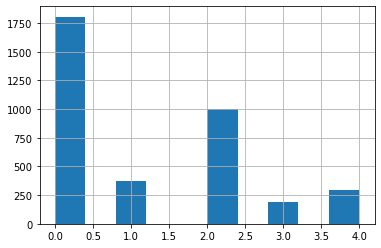

In [4]:
df["diagnosis"].hist();

In [5]:
df["diagnosis"].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

# Get Train Images

In [6]:
files = os.listdir(path + "train_images")

In [7]:
img_list = []

for i in files[0:20]:
    image = cv2.imread(path + "train_images\\" + i)
    image = cv2.resize(src=image, dsize=(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)
    
len(img_list)

20

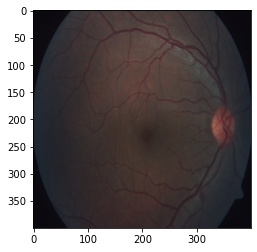

In [8]:
plt.imshow(img_list[6]);

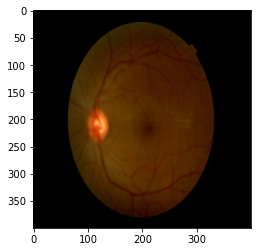

In [9]:
plt.imshow(img_list[4]);

In [10]:
img_list[4].shape

(400, 400, 3)

## Morphological Operations


1- THRESHOLD
 * Threshold works with GRAY Images

2- GAUSSIAN BLUR

3- FIND CONTOURS
 * cv2.RETR_EXTERNAL retrieves only the extreme outer contours of image
 
4- GET COORDINATES

5- CROP IMAGES

6- RESIZE IMAGES 
 * When the images are cropped, their sizes are changed. Therefore we need to rize them again
 
## CLAHE - Contrast-Limited Adaptive Histogram Equalization 
 * To applt CLAHE, we need to convert color from RGB to LAB => cv2.COLOR_RGB2LAB
 * Flatten for Histogram
 * **CLAHE**
 * Merge Operation
 * Convert color from LAB to RGB => cv2.COLOR_LAB2RGB
 * Median Blur for Avoid Noise

(400, 400)

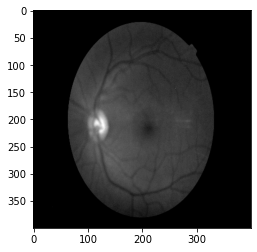

In [11]:
img = cv2.cvtColor(img_list[4].copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray');
img.shape

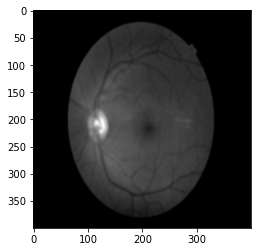

In [12]:
blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)
plt.imshow(blur, cmap='gray');

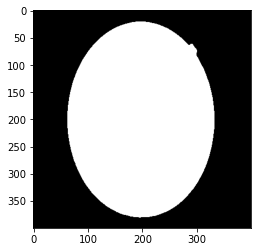

In [13]:
thres = cv2.threshold(blur,10 ,255, cv2.THRESH_BINARY)[1]
plt.imshow(thres, cmap='gray');

In [14]:
contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]

contour

array([[[188,  21]],

       [[187,  22]],

       [[181,  22]],

       [[180,  23]],

       [[177,  23]],

       [[176,  24]],

       [[173,  24]],

       [[172,  25]],

       [[169,  25]],

       [[168,  26]],

       [[166,  26]],

       [[165,  27]],

       [[163,  27]],

       [[162,  28]],

       [[160,  28]],

       [[159,  29]],

       [[158,  29]],

       [[157,  30]],

       [[155,  30]],

       [[154,  31]],

       [[153,  31]],

       [[152,  32]],

       [[151,  32]],

       [[150,  33]],

       [[149,  33]],

       [[148,  34]],

       [[147,  34]],

       [[146,  35]],

       [[145,  35]],

       [[143,  37]],

       [[142,  37]],

       [[141,  38]],

       [[140,  38]],

       [[138,  40]],

       [[137,  40]],

       [[135,  42]],

       [[134,  42]],

       [[131,  45]],

       [[130,  45]],

       [[126,  49]],

       [[125,  49]],

       [[109,  65]],

       [[109,  66]],

       [[104,  71]],

       [[104,  72]],

       [[1

In [15]:
contour.shape

(452, 1, 2)

In [16]:
contour = contour[:,0,:]
contour.shape

(452, 2)

In [17]:
contour

array([[188,  21],
       [187,  22],
       [181,  22],
       [180,  23],
       [177,  23],
       [176,  24],
       [173,  24],
       [172,  25],
       [169,  25],
       [168,  26],
       [166,  26],
       [165,  27],
       [163,  27],
       [162,  28],
       [160,  28],
       [159,  29],
       [158,  29],
       [157,  30],
       [155,  30],
       [154,  31],
       [153,  31],
       [152,  32],
       [151,  32],
       [150,  33],
       [149,  33],
       [148,  34],
       [147,  34],
       [146,  35],
       [145,  35],
       [143,  37],
       [142,  37],
       [141,  38],
       [140,  38],
       [138,  40],
       [137,  40],
       [135,  42],
       [134,  42],
       [131,  45],
       [130,  45],
       [126,  49],
       [125,  49],
       [109,  65],
       [109,  66],
       [104,  71],
       [104,  72],
       [101,  75],
       [101,  76],
       [ 99,  78],
       [ 99,  79],
       [ 97,  81],
       [ 97,  82],
       [ 95,  84],
       [ 95,

In [18]:
contour[:,0].argmax() # max. index

335

In [19]:
contour[335] # max value

array([332, 218], dtype=int32)

In [20]:
contour[:,0].argmin() # min index

111

In [21]:
contour[111] # min value

array([ 63, 185], dtype=int32)

In [22]:
left = tuple(contour[contour[:,0].argmin()])
right = tuple(contour[contour[:,0].argmax()])
top = tuple(contour[contour[:,1].argmin()])
bottom = tuple(contour[contour[:,1].argmax()])

print(f"left: {left}\nright: {right}\ntop: {top}\nbottom: {bottom}\n")

left: (63, 185)
right: (332, 218)
top: (188, 21)
bottom: (194, 380)



In [23]:
x1 = left[0]
y1 = top[1]
x2 = right[0]
y2 = bottom[1]

print(f"left[0]: {x1}\ntop[1]: {y1}\nright[0]: {x2}\nbottom[1]: {y2}\n")

left[0]: 63
top[1]: 21
right[0]: 332
bottom[1]: 380



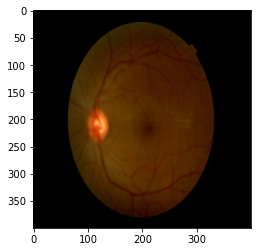

In [24]:
orj_img = img_list[4].copy()
plt.imshow(orj_img);

shape:  (359, 269, 3)


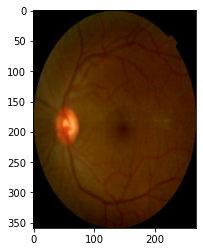

In [25]:
crop_img = orj_img[y1:y2, x1:x2]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


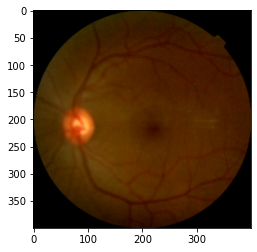

In [26]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

### Crop Images Again to Destroy Black Area

In [27]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

print(x,y)

10 17


shape:  (325, 249, 3)


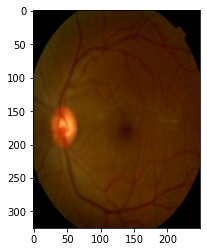

In [28]:
crop_img = orj_img[y1+y:y2-y, x1+x:x2-x]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


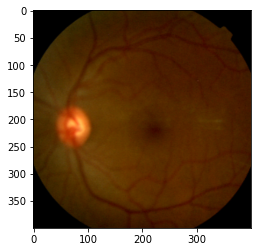

In [29]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

# CLAHE - Contrast-Limited Adaptive Histogram Equalization 

* cv2.COLOR_RGB2LAB
  * LAB 
  * L => Lightness
  * A => Green - Red
  * B => Blue - Yellow 
 

In [30]:
lab = cv2.cvtColor(crop_img, cv2.COLOR_RGB2LAB)

lab.shape

(400, 400, 3)

In [31]:
l, a, b = cv2.split(lab)

shape:  (400, 400)


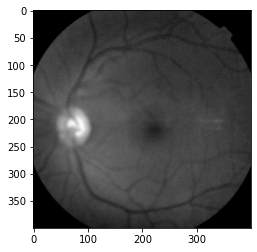

In [32]:
plt.imshow(l, cmap="gray");
print("shape: ", l.shape) # 2D

# Flatten for Histogram

In [33]:
flatten = l.flatten()

flatten.shape

(160000,)

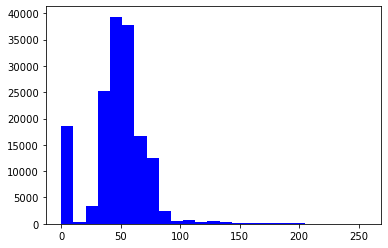

In [34]:
plt.hist(flatten, 25, [0,256], color="b")
plt.show()

# CLAHE - Contrast-Limited Adaptive Histogram Equalization

In [35]:
clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=((8,8)))

cl = clahe.apply(l)

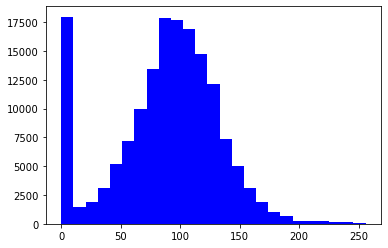

In [36]:
plt.hist(cl.flatten(), 25, [0,256], color="b")
plt.show()

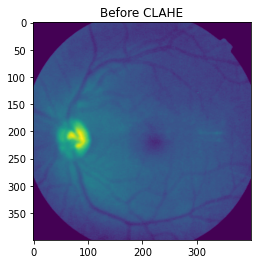

In [37]:
plt.title("Before CLAHE")
plt.imshow(l);

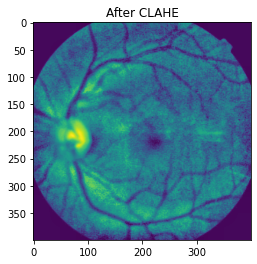

In [38]:
plt.title("After CLAHE")
plt.imshow(cl);

# Merge other channels

In [39]:
merge = cv2.merge((cl, a, b))

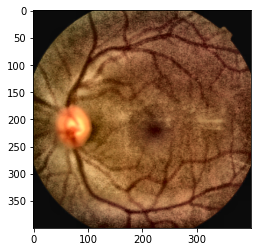

In [40]:
final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)

plt.imshow(final_img);

# Median Blur for Avoid Noise

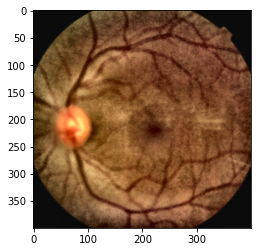

In [41]:
med_blur = cv2.medianBlur(final_img, ksize=3)

plt.imshow(med_blur);

# Mask for Bleeding Vein

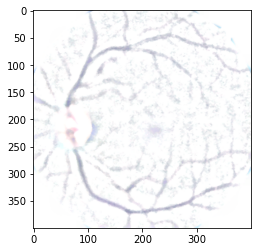

In [42]:
back_ground = cv2.medianBlur(final_img, ksize=35)

mask = cv2.addWeighted(med_blur, 1, back_ground, -1, 255)

plt.imshow(mask);

# Apply Mask to Image

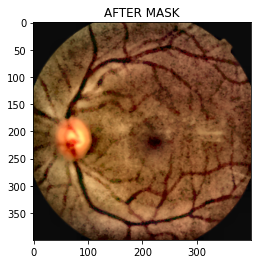

In [43]:
final_mask = cv2.bitwise_and(mask, med_blur)

plt.title("AFTER MASK")
plt.imshow(final_mask);

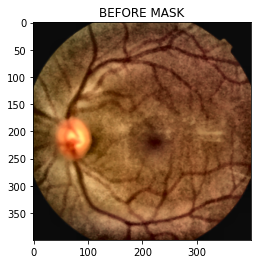

In [44]:
plt.title("BEFORE MASK")
plt.imshow(med_blur);

In [45]:
from tqdm import tqdm_notebook as tqdm

path = "data\\datasets\\"
files = os.listdir(path + "train_images")


def preprocessing(files):
    """
    This function returns images prepared for training
    """
    img_list = []
    for i in tqdm(files):
        image = cv2.imread(path + 'train_images\\' + i)
        image = cv2.resize(image, (240, 240))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        copy = image.copy()
        copy = cv2.cvtColor(copy, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(copy, (5, 5), 0)

        thresh = cv2.threshold(blur, 10, 255, cv2.THRESH_BINARY)[1]

        # CONTOUR DETECTION
        contour = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        contour = contour[0][0]
        contour = contour[:, 0, :]

        # GET COORDINATES
        x1 = tuple(contour[contour[:, 0].argmin()])[0]
        y1 = tuple(contour[contour[:, 1].argmin()])[1]
        x2 = tuple(contour[contour[:, 0].argmax()])[0]
        y2 = tuple(contour[contour[:, 1].argmax()])[1]

        #Crop Images Again to Destroy Black Area
        x = int(x2 - x1) * 4 // 50
        y = int(y2 - y1) * 5 // 50

        # THRES FOR CROPPED IMAGES
        copy2 = image.copy()
        if x2 - x1 > 100 and y2 - y1 > 100:
            copy2 = copy2[y1 + y: y2 - y, x1 + x: x2 - x]
            copy2 = cv2.resize(copy2, (240, 240))

        # LAB
        lab = cv2.cvtColor(copy2, cv2.COLOR_RGB2LAB)
        l, a, b = cv2.split(lab)

        # CLAHE - Contrast-Limited Adaptive Histogram Equalization
        clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=((8, 8)))
        cl = clahe.apply(l)

        # MERGING LAB
        merge = cv2.merge((cl, a, b))
        final_img = cv2.cvtColor(merge, cv2.COLOR_LAB2RGB)
        med_blur = cv2.medianBlur(final_img, 3)
        back_gorund = cv2.medianBlur(final_img, 37)

        # MASK FOR BLEEDING VEIN
        mask = cv2.addWeighted(med_blur, 1, back_gorund, -1, 255)
        final = cv2.bitwise_and(mask, med_blur)
        img_list.append(final)

    return img_list


img_list = preprocessing(files=files)

C:\Users\jyoshna.sarva\AppData\Local\Temp\ipykernel_22292\2108579920.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(files):


  0%|          | 0/3662 [00:00<?, ?it/s]

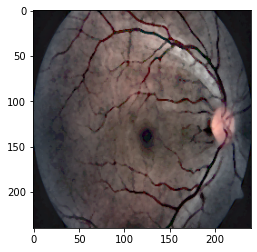

In [46]:
plt.imshow(img_list[6]);

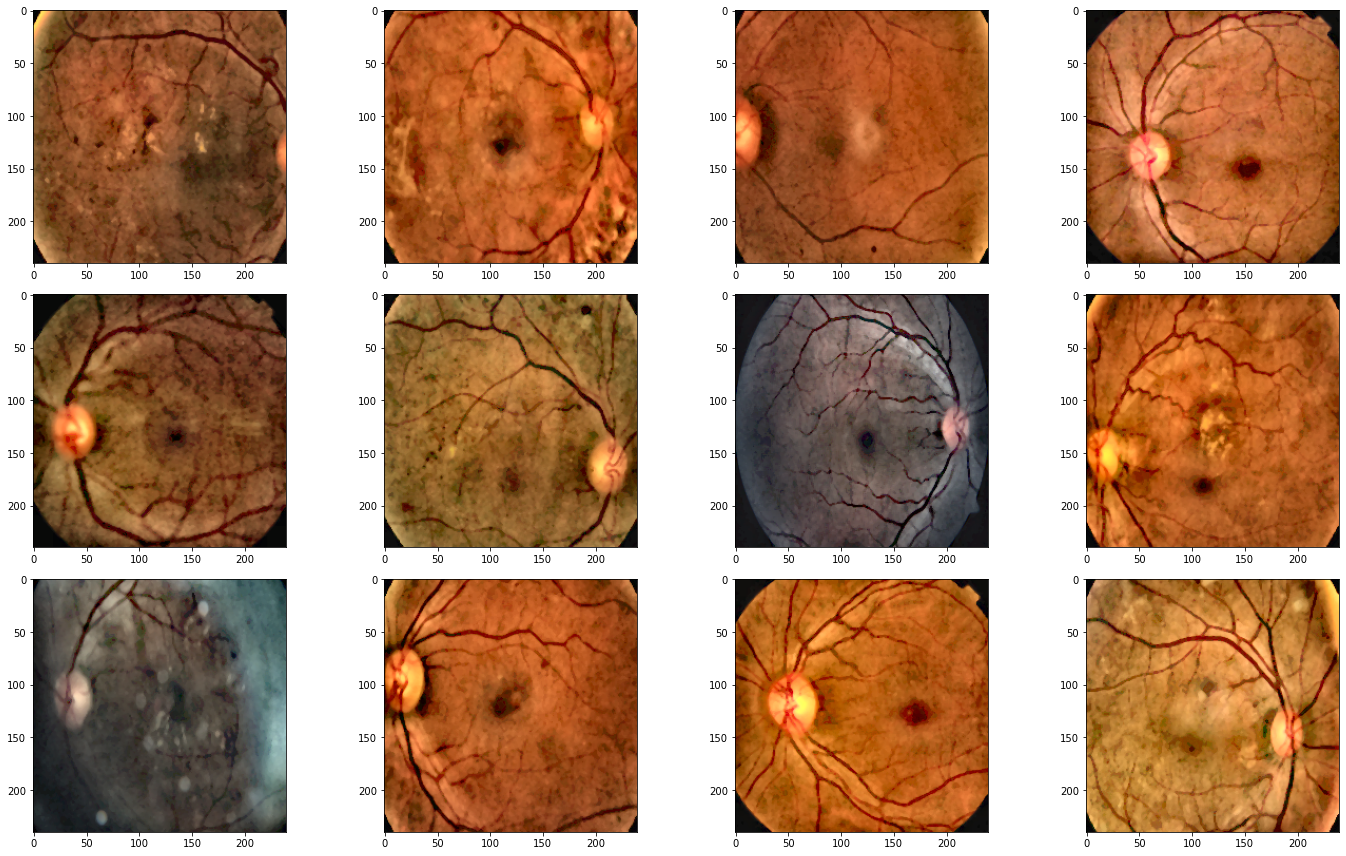

In [47]:
fig = plt.figure(figsize=(20,12))

for i in range(12):
    img = img_list[i]
    fig.add_subplot(3,4,i+1)
    plt.imshow(img)
    
plt.tight_layout()

# One Hot Encoding for DataFrame

In [48]:
df["diagnosis"]

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [49]:
y_train = pd.get_dummies(df["diagnosis"]).values

y_train

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

----

In [50]:
y_train_final = np.ones(y_train.shape, dtype='uint8')

y_train_final

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       ...,
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [51]:
y_train_final[:,4] = y_train[:,4]

y_train_final

array([[1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0],
       ...,
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0]], dtype=uint8)

# Converting to Multi-Label 

In [52]:
for i in range(3,-1,-1):
    y_train_final[:,i] = np.logical_or(y_train[:,i], y_train_final[:,i+1])
    
y_train_final # I will use that

array([[1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=uint8)

In [53]:
y_train # I won't use that

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# !!

Here what I did is that I created a new df that contains result. 

I mean if diagnosis is 3, after One Hot Encoding it looks like that => [0,0,0,1,0]

But it doesn't make sense because if diagnosis is 3, it shows other symptoms like that [1,1,1,1,0] 

Summary, this is not Multi Class problems, this is Multi Label problem ! If person's scala is 3 it means "Severe" this person has other symptoms like 2 => Moderate, 1 => Mild 0 => No DR



# Img to Array

In [54]:
x_train = np.array(img_list)

x_train.shape

(3662, 240, 240, 3)

In [55]:
y_train_final.shape

(3662, 5)

# Train Test Split

In [56]:
X_train, X_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train_final, 
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

In [57]:
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")

X_train: (2929, 240, 240, 3)
X_val: (733, 240, 240, 3)
y_train: (2929, 5)
y_val: (733, 5)


# Data Generator

I didn't apply normalization (rescale=1./255) because Transfer Learning model called "EfficientNetB5" applies itself.

In [58]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True, 
                             zoom_range=0.3,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             fill_mode='constant', 
                             cval=0.1)

batch_size = 2

data_generator = datagen.flow(X_train,
                              y_train,
                              batch_size=batch_size,
                              seed=42)

# Transfer Learning

In [59]:
# pip install git+https://github.com/qubvel/segmentation_models

In [60]:
model = Sequential()
model.add(EfficientNetB5(include_top=False, input_shape=(240,240,3)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(5, activation="sigmoid"))

In [61]:
model.compile(loss='binary_crossentropy',
               optimizer=Adam(lr=0.00005),
               metrics=['accuracy'])

C:\Users\jyoshna.sarva\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [62]:
lr = ReduceLROnPlateau(monitor = 'val_loss',
                       patience = 3,
                       verbose = 1,
                       mode='auto',
                       factor=0.25,
                       min_lr=0.000001)

In [63]:
history = model.fit_generator(data_generator,
                              steps_per_epoch = data_generator.n//batch_size,
                              epochs = 1,
                              validation_data = (X_val,y_val),
                              validation_steps=(len(y_val))//batch_size,
                              callbacks = [lr])

C:\Users\jyoshna.sarva\AppData\Local\Temp\ipykernel_22292\3544182402.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator,


1464/1464 [==============================] - 3296s 2s/step - loss: 0.3588 - accuracy: 0.9710 - val_loss: 0.2665 - val_accuracy: 1.0000 - lr: 5.0000e-05


# Save model

In [67]:
open("model.json","w").write(model.to_json())
model.save_weights("model.h5")
# model.save('diabetic_retinopathy_detection_model.h5')